# Preparation of 27 Al NMR Figures

## TODO:

- Try adding orthogonal concentration information to plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure, show
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

In [2]:
# Enable inline plotting with matplotlib
%matplotlib inline

In [3]:
# Get the current working directory.
%pwd

'/home/tylerbiggs/git/pyluminate/notebooks'

In [4]:
# View list of styles available.
print(plt.style.available)

['seaborn-ticks', 'seaborn-darkgrid', 'seaborn-paper', 'seaborn-dark', '_classic_test', 'fivethirtyeight', 'seaborn-bright', 'seaborn-poster', 'grayscale', 'seaborn-whitegrid', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-deep', 'seaborn-white', 'bmh', 'seaborn-dark-palette', 'classic', 'seaborn-notebook', 'seaborn-talk', 'fast', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'dark_background', 'seaborn']


In [5]:
# Pick a style.
plt.style.use('seaborn-darkgrid')

## Import data

In [6]:
# Declare the data path to be imported.
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"
# data_path = '\\Users\\Tyler\\git\\pyluminate\\data\\al_nmr_data.csv'

# Load the *.csv as a pandas dataframe.
AlNMRData = pd.read_csv(data_path)

# Build some derivative columns for ease of use.
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]
AlNMRData['OH_Al_ratio'] = AlNMRData["OH_concentration"] / AlNMRData["Al_concentration"]

### Formatting Columns for Display

In [7]:
# View the current names, calling list() on a pandas data frame
# object gives the column names.
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature',
 'Al_OH_ratio',
 'OH_Al_ratio']

In [8]:
# Create strings for publication formatting.
Al_concentration = "[Al] M"
OH_concentration = "[OH⁻] M"
Al_ppm = "²⁷Al ppm"
# counter_ion = "[Al] M"
temperature = "⁰C"
Al_OH_ratio = "[Al] / [OH⁻] M"
OH_Al_ratio = "[OH⁻] / [Al] M"

## View imported data

In [9]:
# Examine the column names and first few values of the dataframe.
AlNMRData.head()

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.0,80.45,Na+,25,0.005000,200.0
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0


## Demo Whisker Plot
With all options listed.

### Nature of the whisker plots
From the `matplotlib` documentation:

> The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

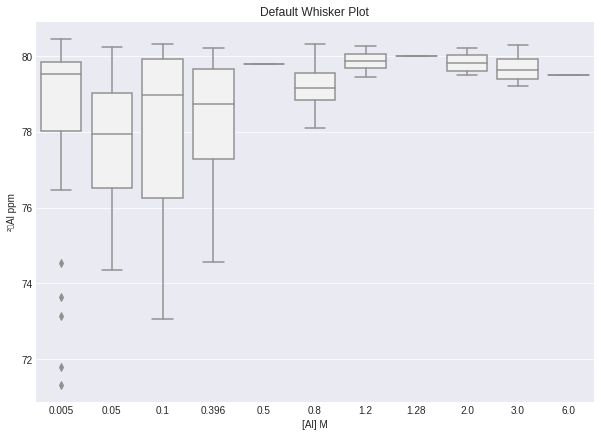

In [10]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes, this is
# not necessary in normal use, and is done for my reference.
boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue=None,
    data=AlNMRData,
    order=None,
    hue_order=None,
    orient=None,
    color='0.95',
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    notch=False,
    ax=ax,
)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Default Whisker Plot')
boxplot_ax.set_xlabel(Al_concentration)
boxplot_ax.set_ylabel(Al_ppm)

# Call the matplotlib show method.
show()

### Nature of the Swarm Plot (Beeswarm)

> Draw a categorical scatterplot with non-overlapping points.

> This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

This plot can be overlapped with the above whisker plot to allow for individual points to be shown.

Text(0,0.5,'²⁷Al ppm')

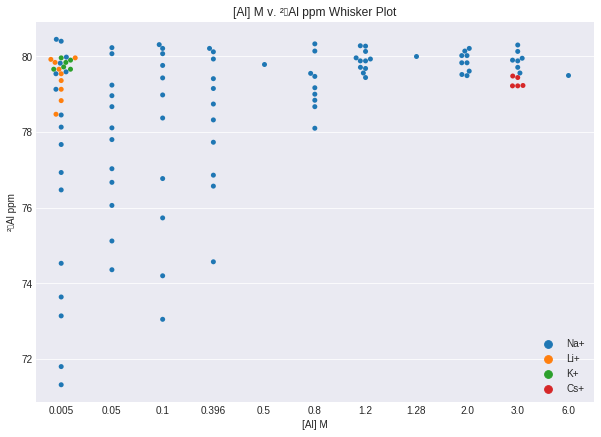

In [11]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes.
boxplot_ax = sns.swarmplot(
    x="Al_concentration",
    y="Al_ppm",
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
)
# Set the legend to the bottom right corner.
ax.legend(loc=4)

boxplot_ax.set_title('{} v. {} Whisker Plot'.format(Al_concentration, Al_ppm))
boxplot_ax.set_xlabel(Al_concentration)
boxplot_ax.set_ylabel(Al_ppm)

## Aluminum Concentration Whisker Plots

### Aluminum Concentration by Counter Ion

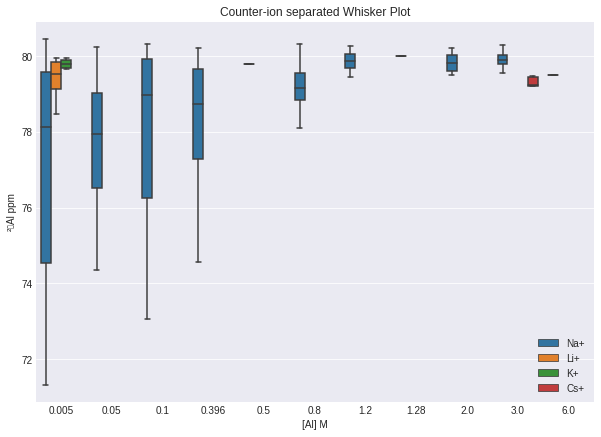

In [12]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

# Included in this call are all available attributes, this is
# not necessary in normal use, and is done for my reference.
boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
)

# Set legend to bottom right corner.
ax.legend(loc=4)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Counter-ion separated Whisker Plot')
boxplot_ax.set_xlabel(Al_concentration)
boxplot_ax.set_ylabel(Al_ppm)

# Call the matplotlib show method.
show()

### Aluminum Concentration by Counter Ion with Swarm

Text(0,0.5,'²⁷Al ppm')

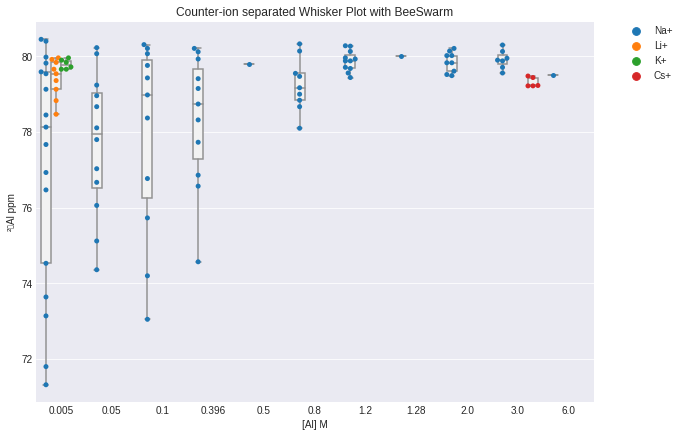

In [13]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

boxplot_ax = sns.swarmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue='counter_ion',
    dodge=True,
    color=None,
    ax=ax,
)

boxplot_ax = sns.boxplot(
    x='Al_concentration',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
    color='0.95',
)

# Get the handles and labels. For this case it will be 8 tuples.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the last 4 elements.
# This time place the legend in the margin.
l = plt.legend(handles[-4:], labels[-4:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Counter-ion separated Whisker Plot with BeeSwarm')
boxplot_ax.set_xlabel(Al_concentration)
boxplot_ax.set_ylabel(Al_ppm)

## Hydroxide Concentration Whisker Plots

For this application the continuous axis of the hydroxide concentration must be binned.

### Binning Hydroxide Concentrations
To make this easy and keep things clean, I will make a new dataframes.

In [14]:
# Create the new cut columns.
for i in range(3,8):
    AlNMRData['cut_{}'.format(i)] = pd.cut(AlNMRData['OH_concentration'], i)

In [15]:
# Check to ensure they have been added.
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature',
 'Al_OH_ratio',
 'OH_Al_ratio',
 'cut_3',
 'cut_4',
 'cut_5',
 'cut_6',
 'cut_7']

In [16]:
# Check the head.
AlNMRData.head()

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio,cut_3,cut_4,cut_5,cut_6,cut_7
0,0.005,1.0,80.45,Na+,25,0.005000,200.0,"(0.121, 6.427]","(0.121, 4.855]","(0.121, 3.912]","(0.121, 3.283]","(0.121, 2.834]"
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0,"(0.121, 6.427]","(4.855, 9.57]","(3.912, 7.684]","(3.283, 6.427]","(2.834, 5.529]"
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0,"(6.427, 12.713]","(4.855, 9.57]","(3.912, 7.684]","(6.427, 9.57]","(5.529, 8.223]"
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0,"(6.427, 12.713]","(9.57, 14.285]","(7.684, 11.456]","(9.57, 12.713]","(10.917, 13.611]"
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0,"(12.713, 19.0]","(9.57, 14.285]","(11.456, 15.228]","(12.713, 15.857]","(10.917, 13.611]"


Text(0,0.5,'²⁷Al ppm')

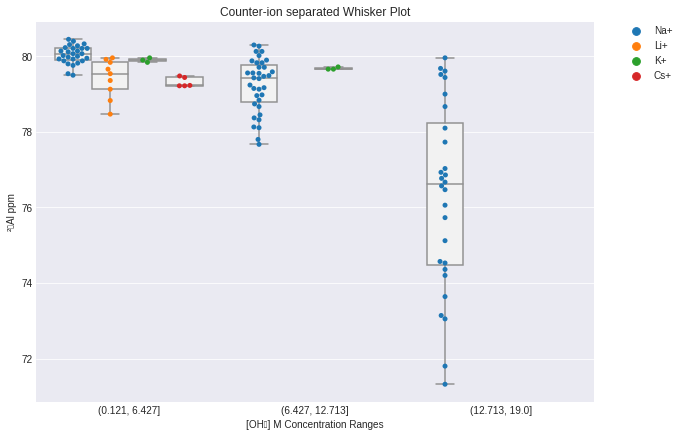

In [17]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

boxplot_ax = sns.swarmplot(
    x="cut_3",
    y="Al_ppm",
    data=AlNMRData,
    hue='counter_ion',
    dodge=True,
    color=None,
    ax=ax,
)

boxplot_ax = sns.boxplot(
    x='cut_3',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
    color='0.95',
)

# Get the handles and labels. For this case it will be 8 tuples.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the last 4 elements.
# This time place the legend in the margin.
l = plt.legend(handles[-4:], labels[-4:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Counter-ion separated Whisker Plot')
boxplot_ax.set_xlabel('{} Concentration Ranges'.format(OH_concentration))
boxplot_ax.set_ylabel(Al_ppm)

Text(0,0.5,'²⁷Al ppm')

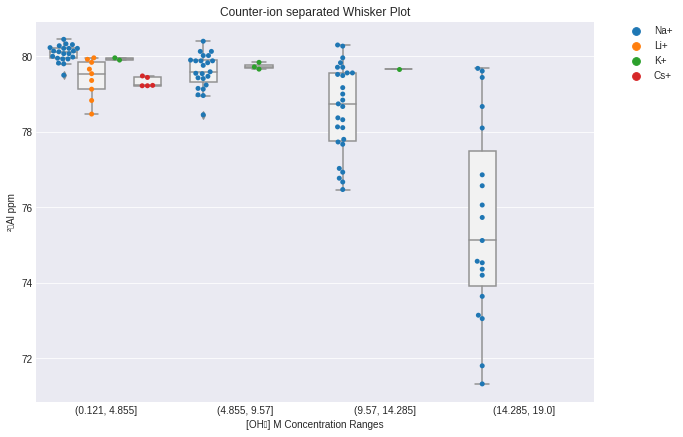

In [18]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

boxplot_ax = sns.swarmplot(
    x="cut_4",
    y="Al_ppm",
    data=AlNMRData,
    hue='counter_ion',
    dodge=True,
    color=None,
    ax=ax,
)

boxplot_ax = sns.boxplot(
    x='cut_4',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
    color='0.95',
)

# Get the handles and labels. For this case it will be 8 tuples.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the last 4 elements.
# This time place the legend in the margin.
l = plt.legend(handles[-4:], labels[-4:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Counter-ion separated Whisker Plot')
boxplot_ax.set_xlabel('{} Concentration Ranges'.format(OH_concentration))
boxplot_ax.set_ylabel(Al_ppm)

Text(0,0.5,'²⁷Al ppm')

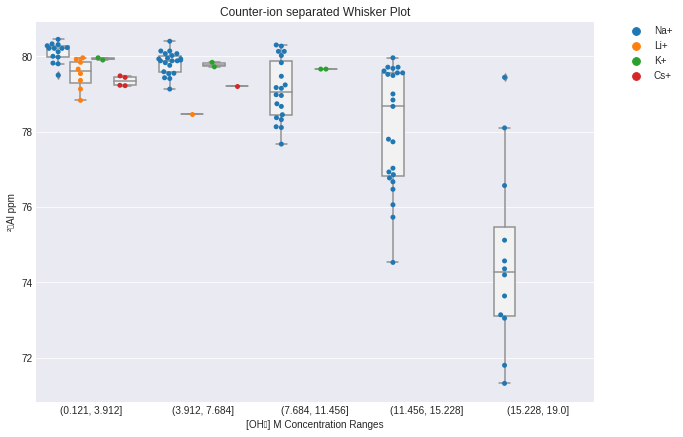

In [19]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

boxplot_ax = sns.swarmplot(
    x="cut_5",
    y="Al_ppm",
    data=AlNMRData,
    hue='counter_ion',
    dodge=True,
    color=None,
    ax=ax,
#     size='Al_concentration'
)

boxplot_ax = sns.boxplot(
    x='cut_5',
    y='Al_ppm',
    hue='counter_ion',
    data=AlNMRData,
    ax=ax,
    color='0.95',
)

# Get the handles and labels. For this case it will be 8 tuples.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the last 4 elements.
# This time place the legend in the margin.
l = plt.legend(handles[-4:], labels[-4:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# sns.boxplot returns a axis object from the matplotlib library.
boxplot_ax.set_title('Counter-ion separated Whisker Plot')
boxplot_ax.set_xlabel('{} Concentration Ranges'.format(OH_concentration))
boxplot_ax.set_ylabel(Al_ppm)

## Swarm Plot with Colormap

Starting with only the sodium series for simplicity.

In [20]:
# Create a new, sodium only, dataframe.
Na_df = AlNMRData[(AlNMRData.counter_ion == 'Na+')]

# Check the head() of the new dataframe.
Na_df.head()

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio,cut_3,cut_4,cut_5,cut_6,cut_7
0,0.005,1.0,80.45,Na+,25,0.005000,200.0,"(0.121, 6.427]","(0.121, 4.855]","(0.121, 3.912]","(0.121, 3.283]","(0.121, 2.834]"
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0,"(0.121, 6.427]","(4.855, 9.57]","(3.912, 7.684]","(3.283, 6.427]","(2.834, 5.529]"
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0,"(6.427, 12.713]","(4.855, 9.57]","(3.912, 7.684]","(6.427, 9.57]","(5.529, 8.223]"
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0,"(6.427, 12.713]","(9.57, 14.285]","(7.684, 11.456]","(9.57, 12.713]","(10.917, 13.611]"
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0,"(12.713, 19.0]","(9.57, 14.285]","(11.456, 15.228]","(12.713, 15.857]","(10.917, 13.611]"


In [21]:
# Create a matplotlib colormap.
cmap = sns.light_palette('red', reverse=False, as_cmap=True)

# Normalize to the range of values found within Al concentration.
norm = matplotlib.colors.Normalize(
    vmin=Na_df['Al_concentration'].min(),
    vmax=Na_df['Al_concentration'].max()
)

# Create a color dictionary.
colors = dict()

# Populate the dictionary.
for val in Na_df['Al_concentration']:
    colors.update({val: cmap(norm(val))})

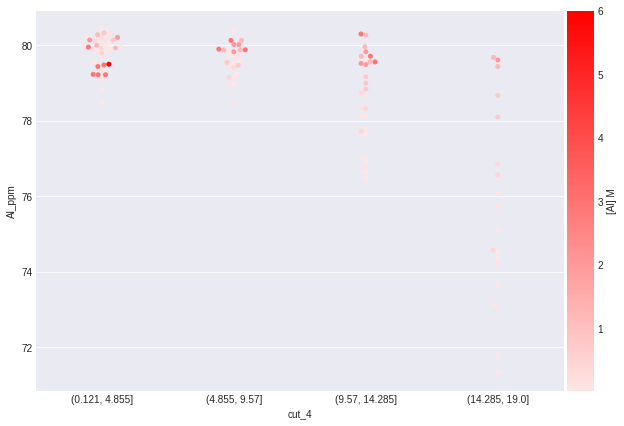

In [29]:
# Create a figure using matplotlib.pyplot.
fig, ax = plt.subplots(figsize=(10,7))

swarm_ax = sns.swarmplot(
    x="cut_4",
    y="Al_ppm",
    data=AlNMRData,
    hue='Al_concentration',
    ax=ax,
    palette=colors,
)

# Remove the legend so we can replace it with a superior version.
plt.gca().legend_.remove()

# Create a colorbar.
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm, orientation='vertical')
cb1.set_label(Al_concentration)
plt.show()